In [10]:
### Diversity analysis ###
# wt

# "estimateAbundance" function infers a complete clonal abundance distribution.
# "alphaDiversity" function generate a smooth diversity (D) curve is generated over a range of diversity orders (q).
# also test the diverstiy (D) at a fixed diversity order (q).

# Load required packages
library(alakazam)
library(dplyr)
library(scales)
library(ggplot2)

db <- readChangeoDb("../../changeo_10x/filtered_contig_heavy_germ-pass.tsv", select = NULL, drop = NULL, seq_upper = TRUE)

In [2]:
# Partitions the data based on the sample column
clones <- countClones(db)
head(clones, 5)

clone_id,seq_count,seq_freq
<chr>,<int>,<dbl>
186_2892,3,0.0006705409
2847_41,3,0.0006705409
1013_2199,2,0.0004470273
1413_717,2,0.0004470273
1474_294,2,0.0004470273


In [4]:
# Partitions the data on the sample column
# Calculates a 95% confidence interval via 200 bootstrap realizations
curve <- estimateAbundance(db, ci=0.95, nboot=200, clone="clone_id")

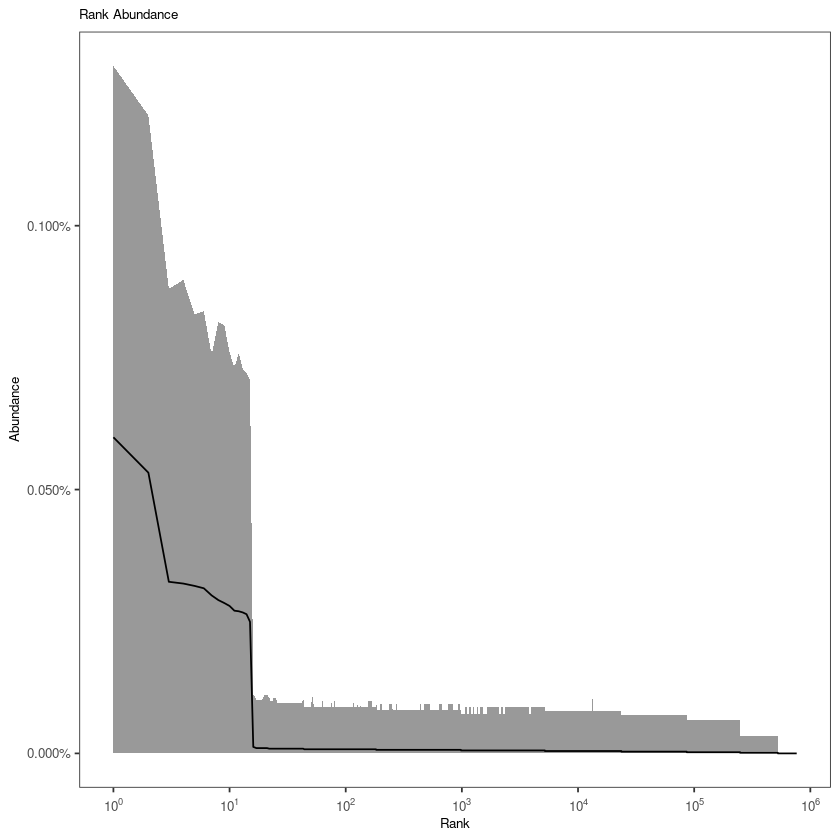

In [6]:
# Plots a rank abundance curve of the relative clonal abundances
plot(curve)

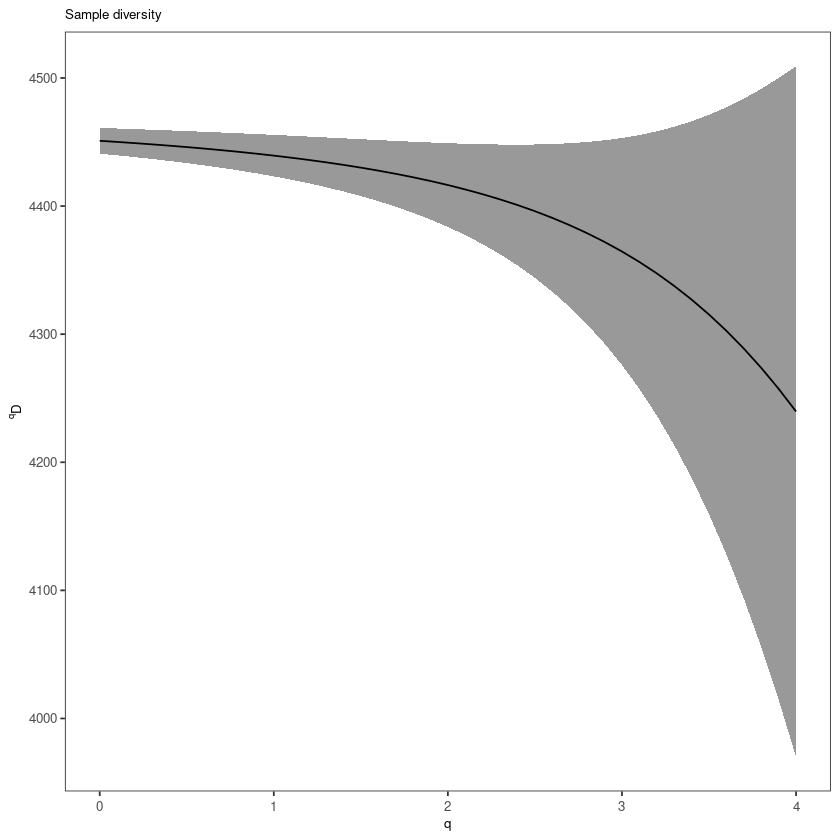

In [7]:
# "alphaDiversity" function re-calculates the clone size distribution and diversity based on the
# each resampling realization. 
# smooth diversity (D) curve is generated over a range of diversity orders (q).

# Compare diversity curve across values in the "sample" column
# q ranges from 0 (min_q=0) to 4 (max_q=4) in 0.05 increments (step_q=0.05)
# A 95% confidence interval will be calculated (ci=0.95)
# 200 resampling realizations are performed (nboot=200)
sample_curve <- alphaDiversity(db, clone="clone_id",
                               min_q=0, max_q=4, step_q=0.1,
                               ci=0.95, nboot=200)

# Plot a log-log (log_q=TRUE, log_d=TRUE) plot of sample diversity
# Indicate number of sequences resampled from each group in the title
sample_main <- paste0("Sample diversity")
plot(sample_curve, main_title=sample_main, 
     legend_title="Sample")

In [8]:
# Compare diversity curve across values in the c_call column
# Analyse is restricted to c_call values with at least 30 sequences by min_n=30
# Excluded groups are indicated by a warning message
isotype_curve <- alphaDiversity(db, group="c_call", clone="clone_id",
                                min_q=0, max_q=4, step_q=0.1,
                                ci=0.95, nboot=200)

# Plot isotype diversity using default set of Ig isotype colors
isotype_main <- paste0("Isotype diversity")
plot(isotype_curve, main_title=isotype_main, 
     legend_title="Isotype")

Warning message in estimateAbundance(data, ci = 0.95, ...):
“Not all groups passed threshold min_n=30. Excluded: IGHA, IGHG1, IGHG2B, IGHG2C, IGHG3, NA”


ERROR: Error in if (f2 > 0) {: missing value where TRUE/FALSE needed
